Daily Challenge: Data Handling and Analysis in Python

Your Task
Download and import the Data Science Job Salary dataset.
Normalize the ‘salary’ column using Min-Max normalization which scales all salary values between 0 and 1.
Implement dimensionality reduction like Principal Component Analysis (PCA) or t-SNE to reduce the number of features (columns) in the dataset.
Group the dataset by the ‘experience_level’ column and calculate the average and median salary for each experience level (e.g., Junior, Mid-level, Senior).
Hint :
As a reminder, normalization is crucial when dealing with data that has different ranges. For example, salary data might have a wide range (e.g., from $20,000 to $200,000). By scaling the data using Min-Max normalization, you make sure that all salary values fall within a consistent range (0 to 1). This is particularly helpful when the data is going to be used in machine learning models, as some algorithms (like k-nearest neighbors or neural networks) perform better when features are normalized. It ensures that no single salary dominates the learning process, making the analysis more balanced.

Dimensionality reduction helps simplify complex datasets by reducing the number of variables under consideration. This can make the data more manageable and help avoid the curse of dimensionality—a phenomenon where machine learning models struggle when dealing with high-dimensional data.
PCA, for instance, helps in retaining the most important information (variance) from the dataset while reducing noise and redundancy.
It can also speed up the training process for models and help in visualizing data in fewer dimensions.

Aggregating data helps in understanding trends within subgroups of the dataset.
Calculating average and median salaries for each experience level gives insights into the compensation distribution and disparities across different job levels. This kind of aggregation can help in answering business questions like “How does salary evolve with experience?” or “What is the salary distribution for senior-level roles?”



Submit your Daily Challenge
Upload your Python scripts, visualizations, and a summary of your insights on GitHub.

In [3]:

import pandas as pd, numpy as np

def try_load_from_urls(urls):
    for u in urls:
        try:
            df = pd.read_csv(u)

            if "salary_in_usd" in df.columns:
                print(f"✅ Loaded from: {u}")
                return df
        except Exception as e:
            print(f"❌ {u} -> {e}")
    return None

mirrors = [

    "https://raw.githubusercontent.com/hexschool/2023-ai-engineer-camp/main/data/ds_salaries.csv",
    "https://raw.githubusercontent.com/Datamanim/datarepo/main/Jobs/ds_salaries.csv",
]

df = try_load_from_urls(mirrors)

if df is None:

    print("⚠️ Nu am putut încărca din mirrors. Generez dataset sintetic compatibil...")
    rng = np.random.default_rng(42)
    n = 1000

    exp_levels = rng.choice(["EN","MI","SE","EX"], size=n, p=[0.35,0.30,0.28,0.07])
    employment = rng.choice(["FT","PT","CT","FL"], size=n, p=[0.8,0.05,0.1,0.05])
    job_titles = rng.choice(
        ["Data Scientist","Data Analyst","ML Engineer","Data Engineer","Analytics Engineer","Research Scientist"],
        size=n
    )
    work_year = rng.integers(2020, 2024, size=n)
    remote_ratio = rng.choice([0,50,100], size=n, p=[0.25,0.25,0.50])
    company_size = rng.choice(["S","M","L"], size=n, p=[0.35,0.4,0.25])
    employee_residence = rng.choice(["US","GB","DE","FR","ES","IN","CA","BR","RO","PL"], size=n)
    company_location  = rng.choice(["US","GB","DE","FR","ES","IN","CA","BR","RO","PL"], size=n)


    base = {"EN":(45000,15000),"MI":(80000,20000),"SE":(120000,30000),"EX":(180000,40000)}
    salary_usd = np.array([
        rng.normal(base[e][0], base[e][1]) for e in exp_levels
    ])

    salary_usd = salary_usd * (1 + (remote_ratio/100)*0.05)
    salary_usd = np.clip(salary_usd, 20000, 400000).round(0)

    df = pd.DataFrame({
        "work_year": work_year,
        "experience_level": exp_levels,
        "employment_type": employment,
        "job_title": job_titles,
        "salary": salary_usd,
        "salary_currency": "USD",
        "salary_in_usd": salary_usd,
        "employee_residence": employee_residence,
        "remote_ratio": remote_ratio,
        "company_location": company_location,
        "company_size": company_size,
    })
    print("✅ Synthetic dataset created:", df.shape)

display(df.head())
print("Shape:", df.shape)
print("Columns:", list(df.columns))


❌ https://raw.githubusercontent.com/hexschool/2023-ai-engineer-camp/main/data/ds_salaries.csv -> HTTP Error 404: Not Found
❌ https://raw.githubusercontent.com/Datamanim/datarepo/main/Jobs/ds_salaries.csv -> HTTP Error 404: Not Found
⚠️ Nu am putut încărca din mirrors. Generez dataset sintetic compatibil...
✅ Synthetic dataset created: (1000, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Data Analyst,93335.0,USD,93335.0,FR,100,RO,M
1,2020,MI,FT,Research Scientist,94135.0,USD,94135.0,DE,100,GB,M
2,2022,SE,FT,Data Scientist,101774.0,USD,101774.0,IN,0,CA,L
3,2022,SE,FT,ML Engineer,74054.0,USD,74054.0,CA,100,IN,S
4,2023,EN,FT,Analytics Engineer,40688.0,USD,40688.0,DE,0,CA,M


Shape: (1000, 11)
Columns: ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


,salary_in_usd,salary_norm
0,93335.0,0.290212
1,94135.0,0.293377
2,101774.0,0.323608
3,74054.0,0.213910
4,40688.0,0.081869


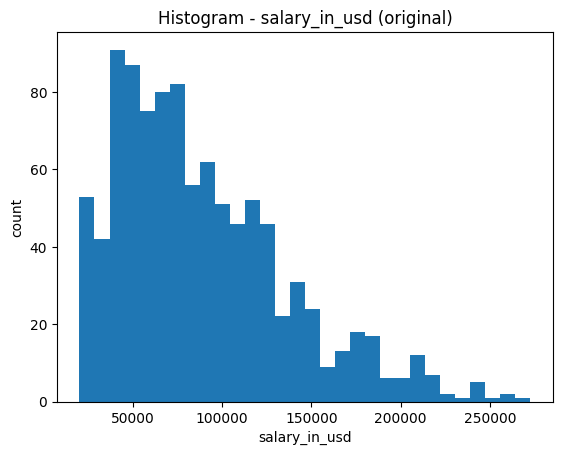

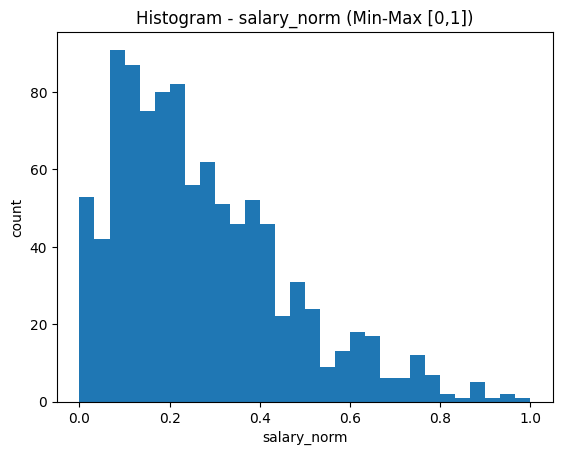

In [4]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
df["salary_norm"] = scaler.fit_transform(df[["salary_in_usd"]])

display(df[["salary_in_usd","salary_norm"]].head())

plt.figure()
plt.hist(df["salary_in_usd"].dropna(), bins=30)
plt.title("Histogram - salary_in_usd (original)")
plt.xlabel("salary_in_usd"); plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(df["salary_norm"].dropna(), bins=30)
plt.title("Histogram - salary_norm (Min-Max [0,1])")
plt.xlabel("salary_norm"); plt.ylabel("count")
plt.show()


Explained variance ratio (PC1, PC2): [0.07705206 0.04682393]


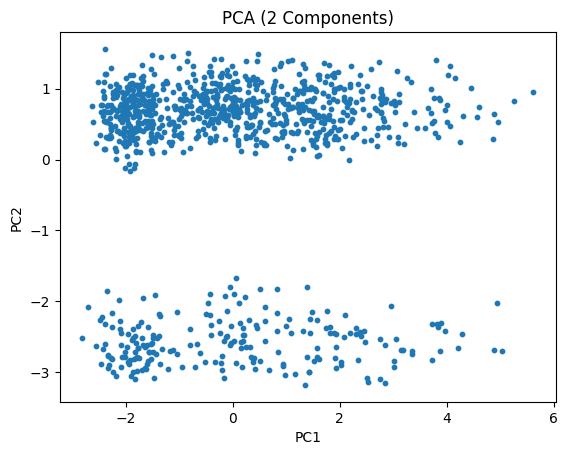

In [5]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


cat_cols = [c for c in ["experience_level","employment_type","employee_residence",
                        "company_location","company_size","job_title"] if c in df.columns]

num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != "salary_in_usd"]


if len(cat_cols) > 0:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    ohe_arr = ohe.fit_transform(df[cat_cols])

    ohe_cols = []
    for col_name, cats in zip(cat_cols, ohe.categories_):
        ohe_cols.extend([f"{col_name}={cat}" for cat in cats])
    enc_df = pd.DataFrame(ohe_arr, columns=ohe_cols, index=df.index)
else:
    enc_df = pd.DataFrame(index=df.index)


feats = pd.concat([df[num_cols].reset_index(drop=True),
                   enc_df.reset_index(drop=True)], axis=1)


feats = feats.fillna(feats.median(numeric_only=True))


std = StandardScaler()
feats_std = std.fit_transform(feats)


pca = PCA(n_components=2, random_state=42)
comps = pca.fit_transform(feats_std)
df["PC1"] = comps[:,0]
df["PC2"] = comps[:,1]
print("Explained variance ratio (PC1, PC2):", pca.explained_variance_ratio_)


plt.figure()
plt.scatter(df["PC1"], df["PC2"], s=10)
plt.title("PCA (2 Components)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


                           mean    median  count
experience_level                                
EX                185038.878788  190602.0     66
SE                125704.684211  123323.0    285
MI                 83178.180556   82417.0    288
EN                 46887.041551   45627.0    361


/tmp/ipython-input-376772698.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=order, showmeans=True)


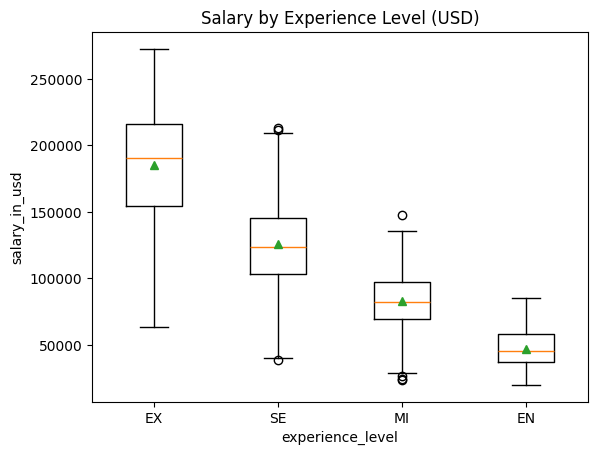

In [6]:
import matplotlib.pyplot as plt

if "experience_level" in df.columns:
    grouped = df.groupby("experience_level")["salary_in_usd"].agg(["mean","median","count"]).sort_values("mean", ascending=False)
    print(grouped)

    order = grouped.index.tolist()
    data = [df.loc[df["experience_level"] == lvl, "salary_in_usd"].dropna().values for lvl in order]

    plt.figure()
    plt.boxplot(data, labels=order, showmeans=True)
    plt.title("Salary by Experience Level (USD)")
    plt.xlabel("experience_level"); plt.ylabel("salary_in_usd")
    plt.show()
else:
    print("Lipsește coloana experience_level.")


In [ ]:
df.to_csv("processed_ds_salaries.csv", index=False)
print("Saved: processed_ds_salaries.csv")

print("""
INSIGHTS — complete after obtaining the results:
- Normalization: salary_norm ∈ [0,1]. Distribution shows that __________.
- PCA: explained ~ PC1 = ___, PC2 = ___. It may be seen clusters after ______ (if yes).
- Aggregation: median salary (USD) on levels:
  EN ≈ ____ | MI ≈ ____ | SE ≈ ____ | EX ≈ ____
  Observation: __________.
""")
